In [1]:
#Import the Libraries Required
import pandas as pd
import random
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [2]:
##The Code to Import the csv file
df = pd.read_csv("C:/Users/ssingh1/Documents/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
#Now Differentiata the Data as per their Data Type
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [7]:
df['Clothing ID'].astype(object).describe()

count     23486
unique     1206
top        1078
freq       1024
Name: Clothing ID, dtype: int64

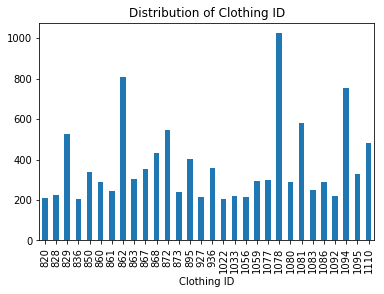

In [8]:
#Univariate Analysis
grouby_clothing_ID = df.groupby('Clothing ID').size()
grouby_clothing_ID = grouby_clothing_ID[grouby_clothing_ID > 200]
grouby_clothing_ID.plot.bar(title = "Distribution of Clothing ID")

In [9]:
df['Age'].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

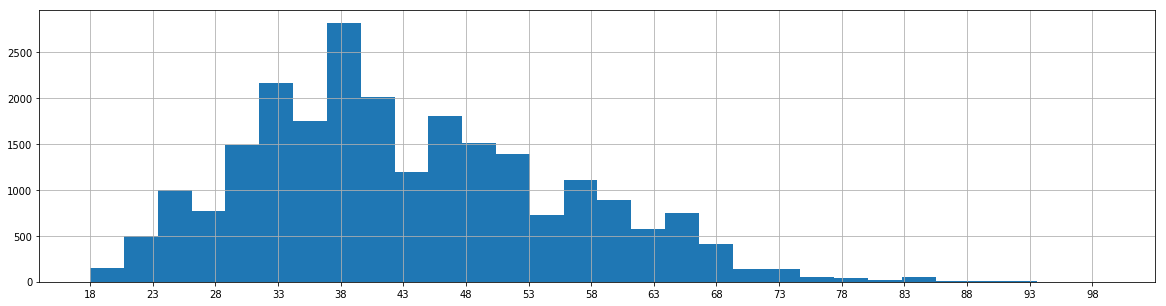

In [10]:
plt.subplots(figsize=(20,5))
plt.xticks(np.arange(min(df['Age']),max(df['Age'])+1, 5))
df['Age'].hist(bins=30)

In [11]:
print("Skewness : " ,df['Age'].skew())
print("kurtosis : " ,df['Age'].kurtosis())


Skewness :  0.5256145063517778
kurtosis :  -0.11182071373186542


In [12]:
df["Title"].describe()

count        19676
unique       13993
top       Love it!
freq           136
Name: Title, dtype: object

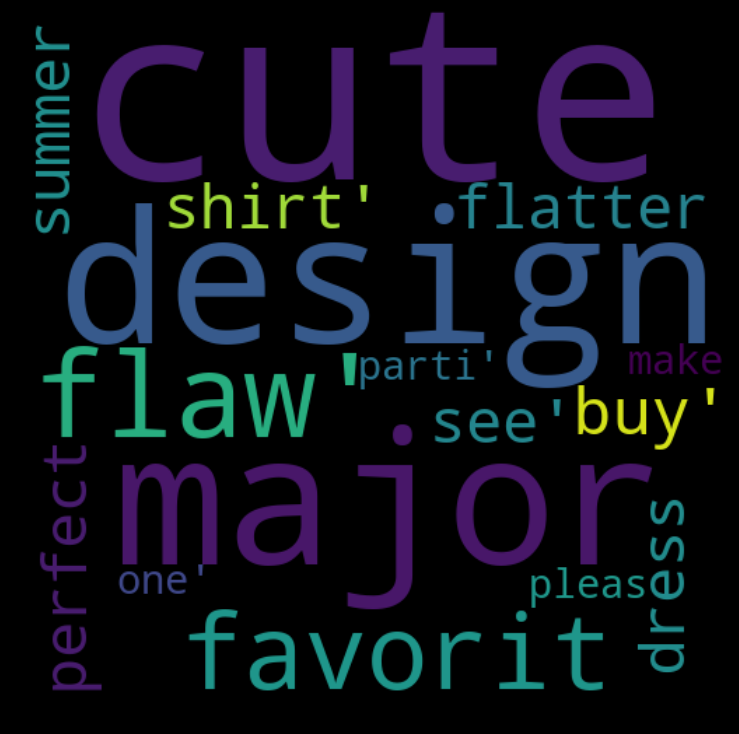

In [94]:
import nltk
from nltk.tokenize import word_tokenize

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

Title = pd.DataFrame()
Title['text'] = df['Title'][df['Title'].notnull()].str.lower().apply(remove_punctuation)

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)
Title['text']= Title['text'].apply(stopwords)


#stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

Title['text'] = Title['text'].apply(stemming)

from wordcloud import WordCloud, STOPWORDS
text = Title['text'].values
wordcloud = WordCloud(
    width = 500,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

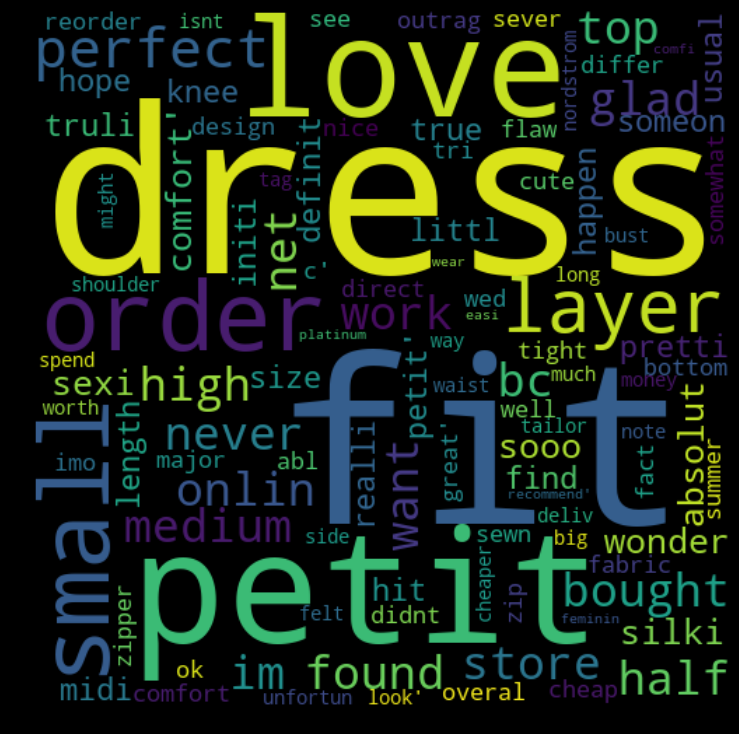

In [95]:
Title = pd.DataFrame()
Title['Review Text'] = df['Review Text'][df['Review Text'].notnull()].str.lower().apply(remove_punctuation)
Title['Review Text']= Title['Review Text'].apply(stopwords)
Title['Review Text'] = Title['Review Text'].apply(stemming)
ReviwText = Title['Review Text'].values
wordcloud = WordCloud(
    width = 500,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(ReviwText))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [96]:
df['Rating'].astype(object).describe()

count     23486
unique        5
top           5
freq      13131
Name: Rating, dtype: int64

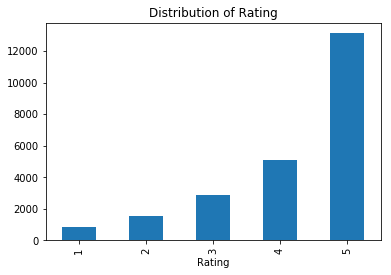

In [97]:
#Univariate Analysis
grouby_Rating = df.groupby('Rating').size()
grouby_Rating.plot.bar(title = "Distribution of Rating")

In [99]:
df['Recommended IND'].astype(object).describe()

count     23486
unique        2
top           1
freq      19314
Name: Recommended IND, dtype: int64

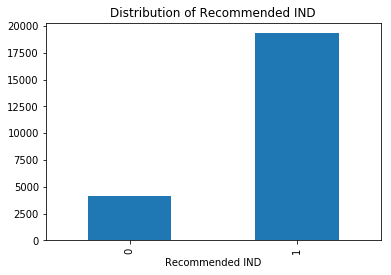

In [100]:
#Univariate Analysis
grouby_Rating = df.groupby('Recommended IND').size()
grouby_Rating.plot.bar(title = "Distribution of Recommended IND")

In [111]:
df['Positive Feedback Count'].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

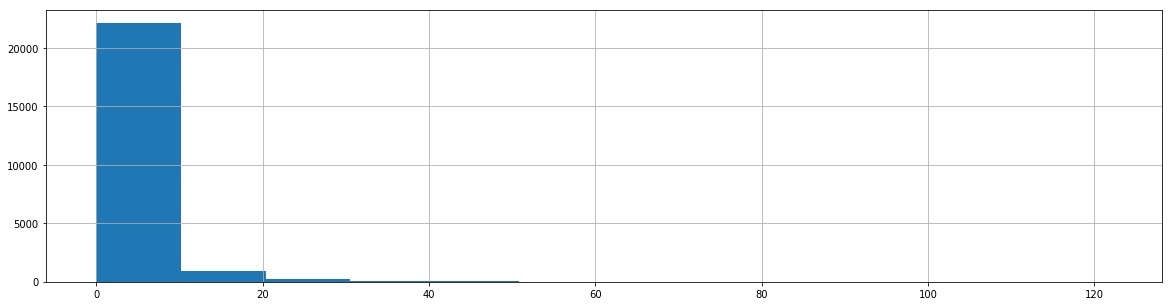

In [132]:
plt.subplots(figsize=(20,5))
df['Positive Feedback Count'].hist(bins=12)

In [112]:
print("Skewness : " ,df['Positive Feedback Count'].skew())
print("kurtosis : " ,df['Positive Feedback Count'].kurtosis())
df['Positive Feedback Count'].median()

Skewness :  6.47299772950122
kurtosis :  71.6931786799819


1.0

In [133]:
df['Division Name'].describe()

count       23472
unique          3
top       General
freq        13850
Name: Division Name, dtype: object

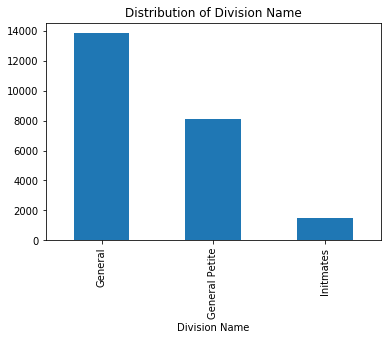

In [134]:
#Univariate Analysis
grouby_Rating = df.groupby('Division Name').size()
grouby_Rating.plot.bar(title = "Distribution of Division Name")

In [135]:
df['Department Name'].describe()

count     23472
unique        6
top        Tops
freq      10468
Name: Department Name, dtype: object

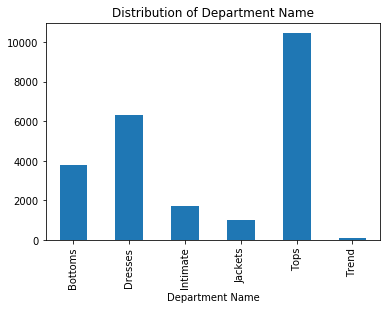

In [136]:
#Univariate Analysis
grouby_Rating = df.groupby('Department Name').size()
grouby_Rating.plot.bar(title = "Distribution of Department Name")

In [137]:
df['Class Name'].describe()

count       23472
unique         20
top       Dresses
freq         6319
Name: Class Name, dtype: object

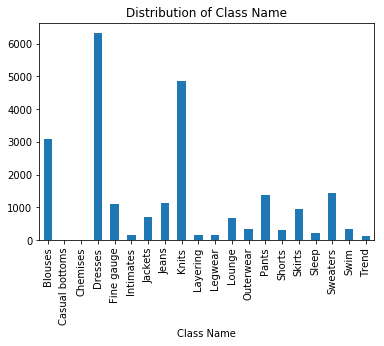

In [138]:
#Univariate Analysis
grouby_Rating = df.groupby('Class Name').size()
grouby_Rating.plot.bar(title = "Distribution of Class Name")

[829, 850, 862, 863, 867, 868, 872, 895, 936, 1078, 1081, 1094, 1095, 1110]


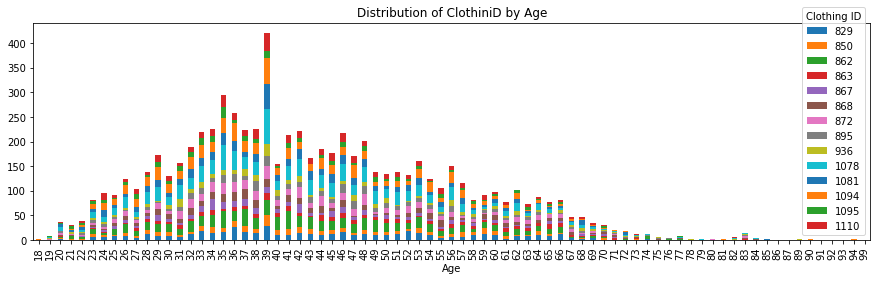

In [216]:
#Bivariate Analysis
#Used most Reviwed
grouby_clothing_ID = df.groupby('Clothing ID').size()
grouby_clothing_ID = grouby_clothing_ID[grouby_clothing_ID > 300]
ClothID = grouby_clothing_ID.index.values.tolist()
print(ClothID)
grouby_ClothinID_Age = df.groupby(['Clothing ID','Age'])['Age'].count().unstack('Clothing ID').fillna(0)
grouby_ClothinID_Age[ClothID].plot.bar(title = "Distribution of ClothiniD by Age", stacked=True, figsize = (15,4))

Clothing ID,829,850,862,863,867,868,872,895,936,1078,1081,1094,1095,1110
Rating,,,,,,,,,,,,,,
1,1.66,0.95,4.39,0.71,2.02,2.85,1.31,0.95,0.36,3.92,2.02,2.85,1.07,0.83
2,2.36,1.73,3.00,1.09,1.98,2.43,1.21,1.85,1.34,3.77,1.85,3.07,2.17,2.04
3,2.44,0.80,3.31,1.08,1.25,2.54,1.95,1.53,1.71,4.74,2.26,3.48,1.57,2.23
4,2.32,1.48,3.25,1.46,1.56,1.91,2.42,1.50,1.34,4.61,2.62,3.41,1.62,1.83
5,2.19,1.56,3.52,1.36,1.43,1.51,2.56,1.88,1.65,4.28,2.57,3.13,1.20,2.16


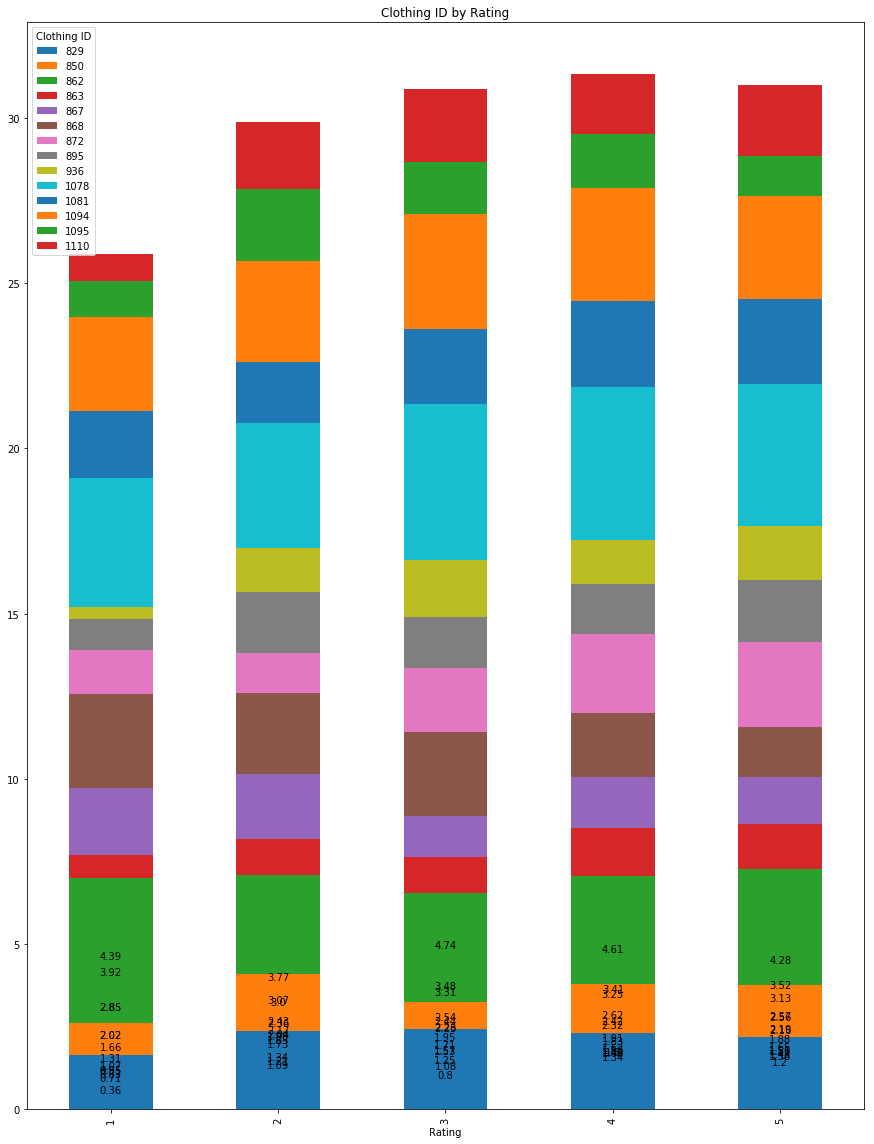

In [60]:
#Bivariate Analysis
#Used most Reviwed
grouby_clothing_ID = df.groupby('Clothing ID').size()
grouby_clothing_ID = grouby_clothing_ID[grouby_clothing_ID > 300]
ClothID = grouby_clothing_ID.index.values.tolist()
grouby_ClothinID_Rating = df.groupby(['Rating','Clothing ID'])['Rating'].count().unstack('Clothing ID').fillna(0)
#grouby_ClothinID_Rating[ClothID].plot.bar(title = "Distribution of Clothing iD by Rating", stacked=True, figsize = (15,20))
grouby_ClothinID_Rating['Total'] = grouby_ClothinID_Rating.sum(axis=1)
grouby_ClothinID_Rating_perc = grouby_ClothinID_Rating
for i in ClothID:
    grouby_ClothinID_Rating_perc[i] = round(grouby_ClothinID_Rating[i]*100/grouby_ClothinID_Rating["Total"],2)
ax = grouby_ClothinID_Rating_perc[ClothID].plot.bar(title = "Distribution of ClothingID by Rating", stacked=True, figsize = (15,20))
ax.set_title('Clothing ID by Rating')
rects = ax.patches
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
autolabel(rects,xpos='center')
grouby_ClothinID_Rating_perc[ClothID]

Rating,1,2,3,4,5,Total
Age_Group,,,,,,
18-28,3.31,5.91,12.74,21.34,56.70,2418
28-38,3.69,7.60,13.50,21.24,53.97,6946
38-48,3.50,6.88,12.06,23.02,54.53,6906
48-58,3.67,5.90,11.61,22.08,56.74,4117
58-68,3.54,5.29,10.31,19.46,61.40,2513
68+,4.10,7.34,9.39,16.72,62.46,586


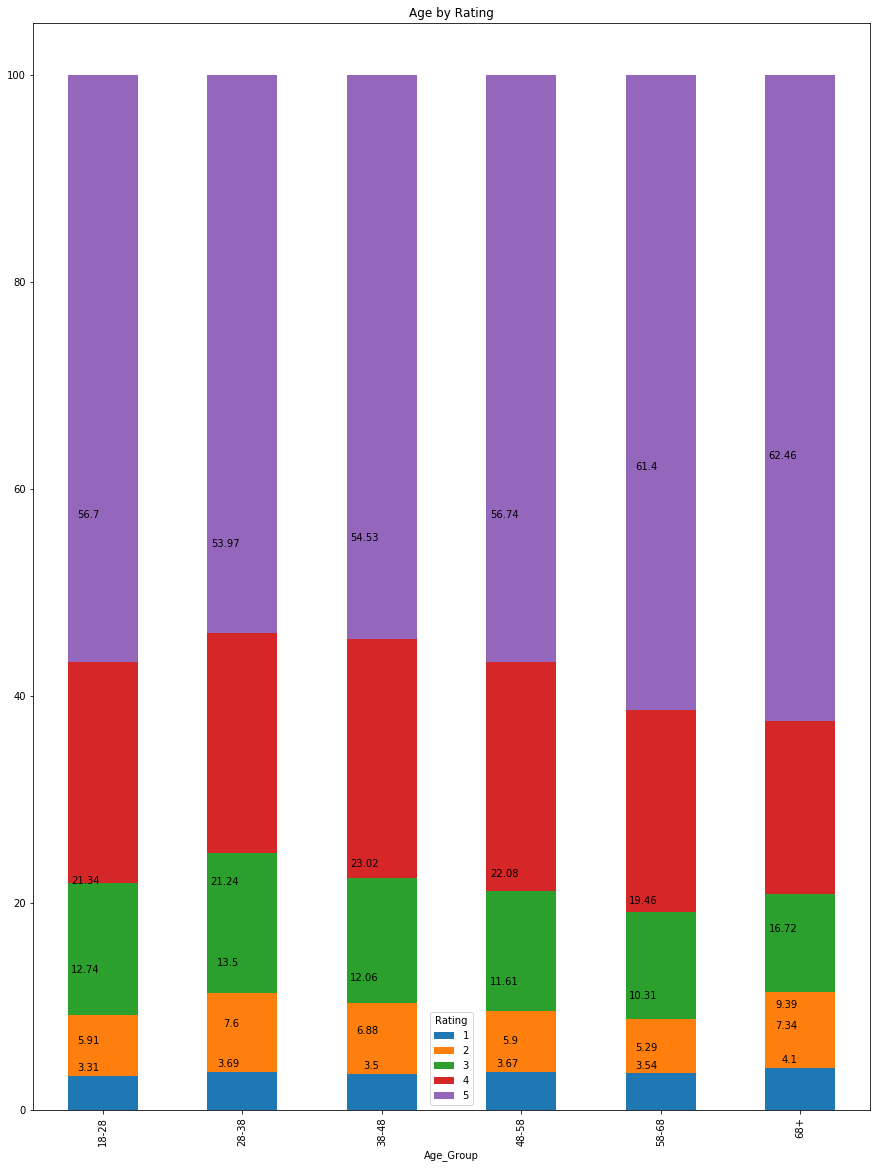

In [61]:
#Bivariate Analysis
#Used most Reviwed
grouby_Rating = df.groupby('Rating').size()
Rating = grouby_Rating.index.values.tolist()
Rating
bins = [17, 28, 38,48,58,68,np.inf]
names = ['18-28', '28-38','38-48','48-58', '58-68','68+']
df['Age_Group'] = pd.cut(df['Age'], bins, labels=names)
 
grouby_Age_Rating = df.groupby(['Age_Group','Rating'])['Age_Group'].count().unstack('Rating').fillna(0)
grouby_Age_Rating['Total'] = grouby_Age_Rating.sum(axis=1)
grouby_Age_Rating_perc = grouby_Age_Rating
grouby_Age_Rating_perc[1] = round(grouby_Age_Rating[1]*100/grouby_Age_Rating["Total"],2)
grouby_Age_Rating_perc[2] = round(grouby_Age_Rating[2]*100/grouby_Age_Rating["Total"],2)
grouby_Age_Rating_perc[3] = round(grouby_Age_Rating[3]*100/grouby_Age_Rating["Total"],2)
grouby_Age_Rating_perc[4] = round(grouby_Age_Rating[4]*100/grouby_Age_Rating["Total"],2)
grouby_Age_Rating_perc[5] = round(grouby_Age_Rating[5]*100/grouby_Age_Rating["Total"],2)

ax = grouby_Age_Rating_perc[Rating].plot.bar(title = "Distribution of Age by Rating", stacked=True, figsize = (15,20))
ax.set_title('Age by Rating')
rects = ax.patches
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
autolabel(rects,xpos='left')
grouby_Age_Rating_perc

Rating,1,2,3,4,5,Total
Age_Group,,,,,,
18-28,3.31,5.91,12.74,21.34,56.70,2418
28-38,3.69,7.60,13.50,21.24,53.97,6946
38-48,3.50,6.88,12.06,23.02,54.53,6906
48-58,3.67,5.90,11.61,22.08,56.74,4117
58-68,3.54,5.29,10.31,19.46,61.40,2513
68+,4.10,7.34,9.39,16.72,62.46,586


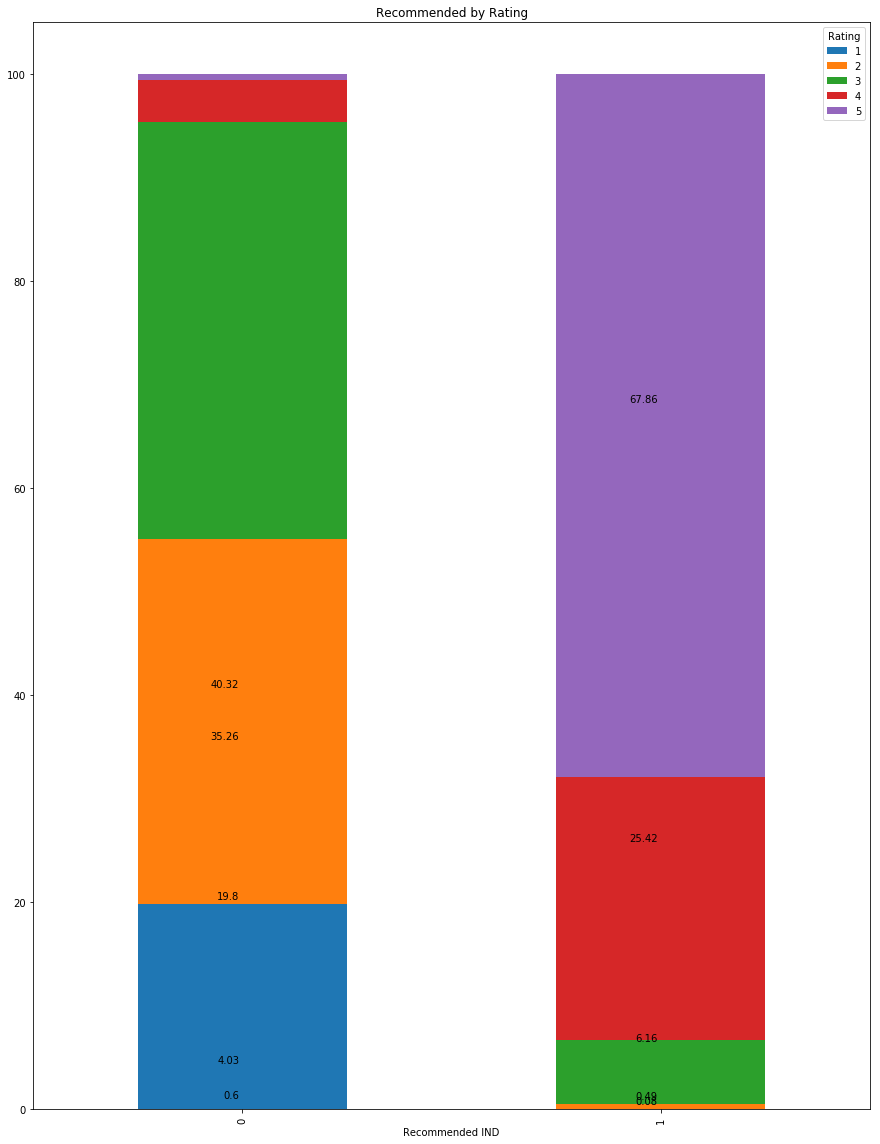

In [62]:
#Bivariate Analysis
#Used most Reviwed
grouby_Rating = df.groupby('Rating').size()
Rating = grouby_Rating.index.values.tolist()
Rating 
grouby_Rec_Rating = df.groupby(['Recommended IND','Rating'])['Recommended IND'].count().unstack('Rating').fillna(0)
grouby_Rec_Rating['Total'] = grouby_Rec_Rating.sum(axis=1)
grouby_Rec_Rating_perc = grouby_Rec_Rating
grouby_Rec_Rating_perc[1] = round(grouby_Rec_Rating[1]*100/grouby_Rec_Rating["Total"],2)
grouby_Rec_Rating_perc[2] = round(grouby_Rec_Rating[2]*100/grouby_Rec_Rating["Total"],2)
grouby_Rec_Rating_perc[3] = round(grouby_Rec_Rating[3]*100/grouby_Rec_Rating["Total"],2)
grouby_Rec_Rating_perc[4] = round(grouby_Rec_Rating[4]*100/grouby_Rec_Rating["Total"],2)
grouby_Rec_Rating_perc[5] = round(grouby_Rec_Rating[5]*100/grouby_Rec_Rating["Total"],2)

ax = grouby_Rec_Rating_perc[Rating].plot.bar(title = "Distribution of Reccomendation by Rating", stacked=True, figsize = (15,20))
ax.set_title('Recommended by Rating')
rects = ax.patches
autolabel(rects,xpos='left')
grouby_Age_Rating_perc

C:\Users\ssingh1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


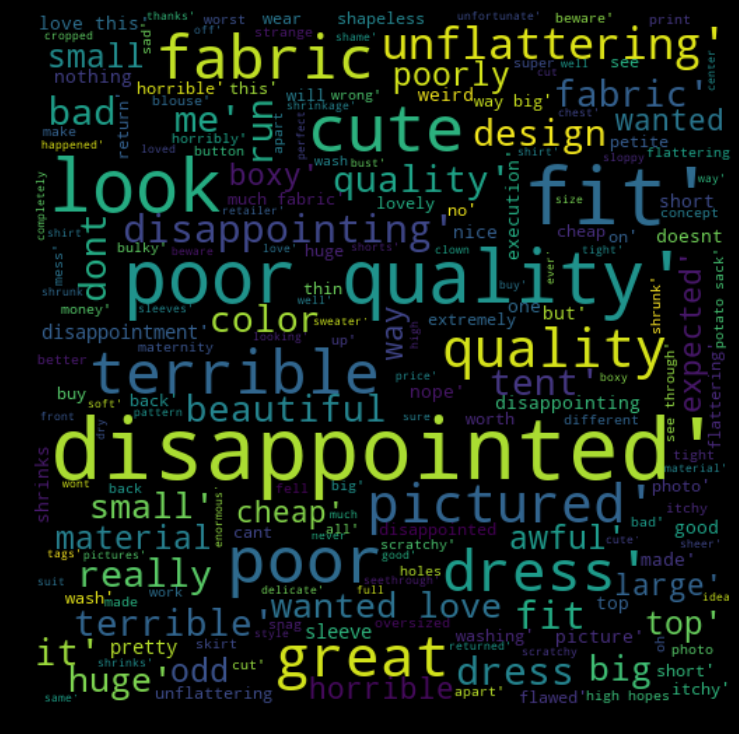

In [73]:
rating_1 = df[['Title','Rating']][df['Rating']==1][df['Title'].notnull()]
rating_1
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
rating_1['Title'] = rating_1['Title'].str.lower().apply(remove_punctuation)

from wordcloud import WordCloud, STOPWORDS
text = rating_1['Title'].values
wordcloud = WordCloud(
    width = 500,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

C:\Users\ssingh1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


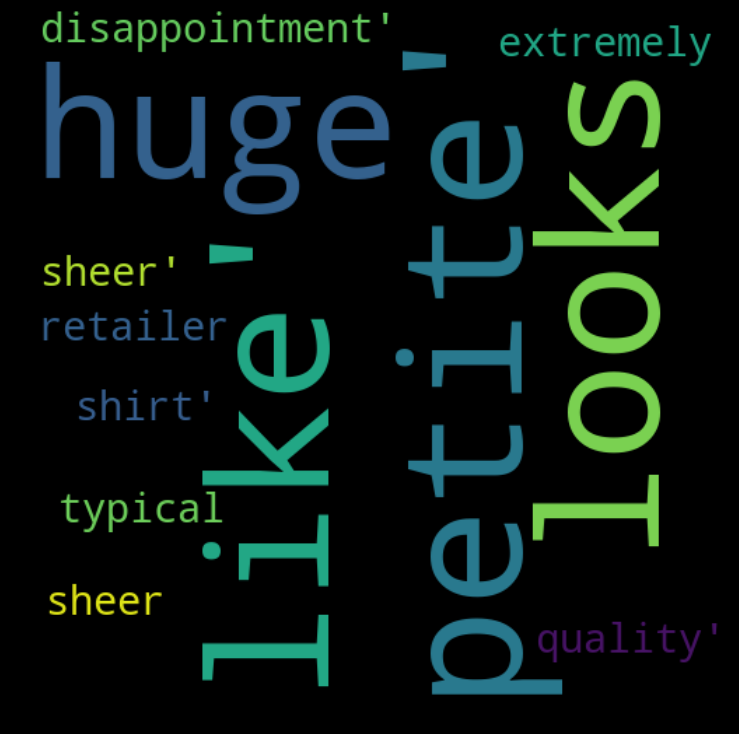

In [74]:
rating_2 = df[['Title','Rating']][df['Rating']==2][df['Title'].notnull()]
rating_2
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
rating_2['Title'] = rating_2['Title'].str.lower().apply(remove_punctuation)

from wordcloud import WordCloud, STOPWORDS
text = rating_2['Title'].values
wordcloud = WordCloud(
    width = 500,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

C:\Users\ssingh1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


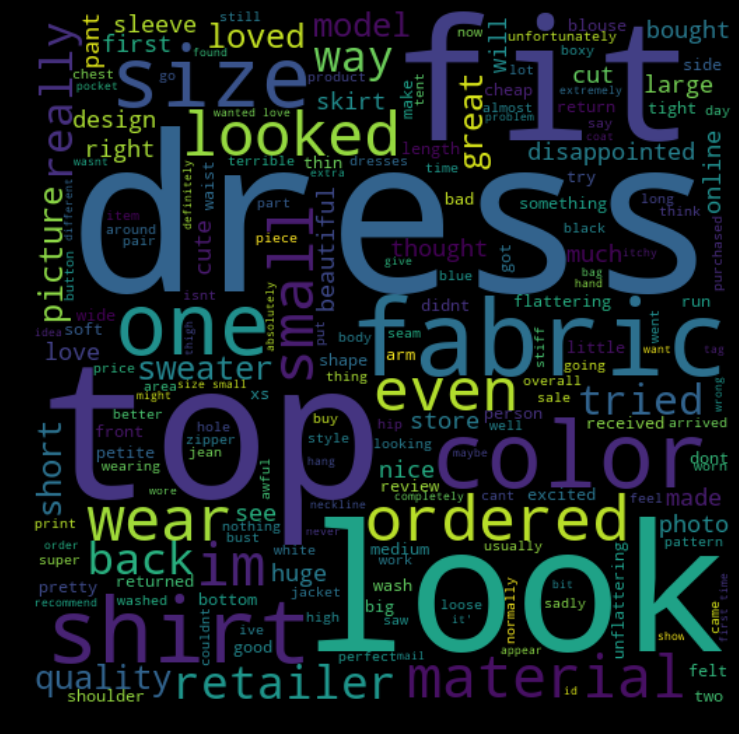

In [75]:
rating_1 = df[['Review Text','Rating']][df['Rating']==1][df['Title'].notnull()]
rating_1
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
rating_1['Review Text'] = rating_1['Review Text'].str.lower().apply(remove_punctuation)

from wordcloud import WordCloud, STOPWORDS
text = rating_1['Review Text'].values
wordcloud = WordCloud(
    width = 500,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()